In [ ]:
'''
【项目03】  统计数学模型构建(1)

作业要求1：
    构建函数f()，对已知函数在给定区间[a,b]上，判断其单调性和凸凹性，已知函数如下：
    f(x)=x^3+100sin⁡x+10
    （1）求该函数在[-7.5,-5]、[-2.5,2.5]、[5,10]区间上的单调性
    （2）求该函数在[-6,-3]、[-3,3]、[3,6]区间上的凸凹性
提示：
    ① 可以先查看函数曲线，有个大致判断
    ② 函数参数建议，见“项目03_要求.docx”文件
    ③ 基于函数的一阶导数、二阶导数基本定义，可以在拆分指定区间情况下，以前后值来计算一阶二阶导数
        比如将指定区间[-10,-5]拆分成1000个值，则第i个值的一阶导数为 → (f(xi[i+1])-f(xi[i]))/x_
    ④ 函数中算出一阶导数、二阶导数的数组dsi_1,dsi_2，判断其正负值并记录数量，以此判断单调性及凸凹性

作业要求2：
    构建二分法函数f_solve()，对上述函数进行求解，分别求出当f(x)=500, f(x)=100时候的x近似值
提示：
    ① 可以先通过图表来查看根的个数，并得到根对应的近似值求解区：
        f(x) = 500, 有且只有1个根，求解区间可以为[5,10]
        f(x) = 100，有3个根, 求解区间可以为[0,2]，[2,5]，[5,8]
    ② 函数参数建议，见“项目03_要求.docx”文件

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
# 导入模块

import warnings
warnings.filterwarnings('ignore') 
# 不发出警告

作业1

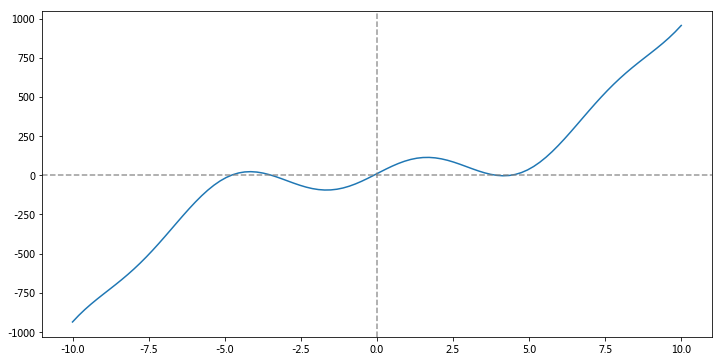

In [2]:
# 查看函数曲线

def f(x):
    return x**3 + np.sin(x)*100 + 10 # 函数

plt.figure(figsize = (12,6))
n = np.linspace(-10,10,num = 100)
plt.plot(n,f(n))

plt.axvline(0,color = 'gray',linestyle = '--',alpha=0.8)  
plt.axhline(0,color = 'gray',linestyle = '--',alpha=0.8)  
# 辅助线

In [3]:
# 构建函数dd()，判断单调性
# 求该函数在[-7.5,-5]、[-2.5,2.5]、[5,10]区间上的单调性

def dd(n,*q):
    '''
    构建函数dd()，判断单调性
    n：函数在指定区间内的切分精度，n越大，[a,b]区间中拆分的值越多
    *q：可变参数，这里输入2个元素作为区间
    '''
    xi = np.linspace(q[0],q[1],num = n)  
    yi = f(xi)
    x_ = (q[1]-q[0])/len(xi) 
    # 拆分数据，得到xi数组及对应的f(x)值yi数组，x_为xi间隔长度
    dsi_1 = np.array([(f(xi[i+1])-f(xi[i]))/x_ for i in range(len(xi))[:-1]])
    dsi_2 = np.array([(dsi_1[i+1]-dsi_1[i])/x_ for i in range(len(dsi_1))[:-1]])
    # 算出一阶导数、二阶导数的数组dsi_1,dsi_2
    n1 = len(dsi_1[dsi_1>=0])
    n2 = len(dsi_1[dsi_1<=0])
    # 判断一阶导数的正负值，并记录数量
    if n1 == 0 and n2 >=0 :
        return '该函数在[%.1f,%.1f]区间上单调递减' % (q[0],q[1])
    elif n2 == 0 and n1 >=0 :
        return '该函数在[%.1f,%.1f]区间上单调递增' % (q[0],q[1])
    else:
        return '该函数在[%.1f,%.1f]区间上不存在单调性' % (q[0],q[1])
    
print(dd(1000,-7.5,-5))
print(dd(1000,-2.5,2.5))
print(dd(1000,5,10))

该函数在[-7.5,-5.0]区间上单调递增
该函数在[-2.5,2.5]区间上不存在单调性
该函数在[5.0,10.0]区间上单调递增


In [4]:
# 构建函数ta()，判断凸凹性
# 求该函数在[-6,-3]、[-3,3]、[3,6]区间上的凸凹性

def ta(n,*q):
    '''
    构建函数ta()，判断凸凹性
    n：函数在指定区间内的切分精度，n越大，[a,b]区间中拆分的值越多
    *q：可变参数，这里输入2个元素作为区间
    '''
    xi = np.linspace(q[0],q[1],num = n)  
    yi = f(xi)
    x_ = (q[1]-q[0])/len(xi) 
    # 拆分数据，得到xi数组及对应的f(x)值yi数组，x_为xi间隔长度
    dsi_1 = np.array([(f(xi[i+1])-f(xi[i]))/x_ for i in range(len(xi))[:-1]])
    dsi_2 = np.array([(dsi_1[i+1]-dsi_1[i])/x_ for i in range(len(dsi_1))[:-1]])
    # 算出一阶导数、二阶导数的数组dsi_1,dsi_2
    n1 = len(dsi_2[dsi_2>=0])
    n2 = len(dsi_2[dsi_2<=0])
    # 判断二阶导数的正负值，并记录数量
    if n1 == 0 and n2 >=0 :
        return '该函数在[%.1f,%.1f]区间上为凸函数' % (q[0],q[1])
    elif n2 == 0 and n1 >=0 :
        return '该函数在[%.1f,%.1f]区间上为凹函数' % (q[0],q[1])
    else:
        return '该函数在[%.1f,%.1f]区间上不存在凹凸性' % (q[0],q[1])

print(ta(1000,-6,-3))
print(ta(1000,-3,3))
print(ta(1000,3,6))

该函数在[-6.0,-3.0]区间上为凸函数
该函数在[-3.0,3.0]区间上不存在凹凸性
该函数在[3.0,6.0]区间上为凹函数


作业2

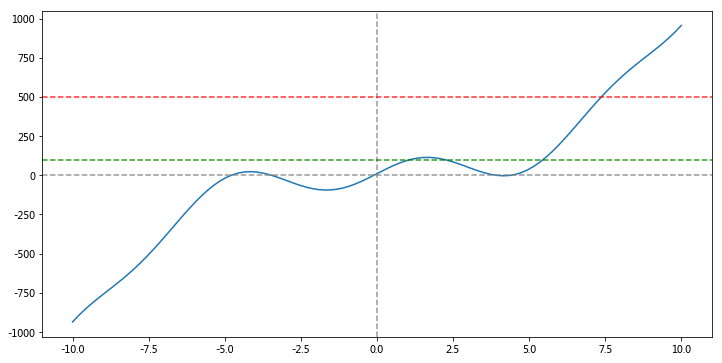

In [5]:
# 查看f(x) = 500时候的x区间范围

plt.figure(figsize = (12,6))
plt.plot(n,f(n))
plt.axvline(0,color = 'gray',linestyle = '--',alpha=0.8)  
plt.axhline(0,color = 'gray',linestyle = '--',alpha=0.8)  
# 辅助线

plt.axhline(500,color = 'red',linestyle = '--',alpha=0.8)  
# f(x) = 500, 有且只有1个根

plt.axhline(100,color = 'green',linestyle = '--',alpha=0.8)
# f(x) = 100，有3个根

In [6]:
# 构建二分法函数f_solve()

def f_solve(yi,n,*q):
    '''
    构建函数f_solve()，二分法求近似值
    注意，如果求f(x)=yi时x的值，相当于求g(x)=f(x)-yi=0的实根
    yi：函数值
    n：迭代次数
    *q：可变参数，这里输入2个元素作为区间
    '''
    lst = list(q)
    ni = 0
    while ni < n:
        z = (lst[0]+lst[1])/2
        if (f(z)-yi)*(f(lst[0])-yi) > 0:   # 即与f(q[0])同号
            lst[0] = z
        else:
            lst[1] = z    
        #print('第%i次迭代的隔离区间为' % (ni+1),lst)
        ni += 1
    return (lst[0]+lst[1])/2

print('finished!')

finished!


In [7]:
# 求解：当f(x)=500, f(x)=100时候的x近似值

print('当f(x)=500时，x的近似值为：%.3f' % f_solve(500,100,5,10))
print('当f(x)=100时，x的近似值分别为：%.3f, %.3f, %.3f' % (f_solve(100,100,0,2),f_solve(100,100,2,5),f_solve(100,100,5,8)))

当f(x)=500时，x的近似值为：7.376
当f(x)=100时，x的近似值分别为：1.091, 2.233, 5.464
